# 3D Grid Visualization from Depth Map using OpenCV and Matplotlib

This notebook takes a grayscale depth map and visualizes it as a 3D point grid.  
It demonstrates how to convert 2D pixel intensity values into 3D spatial points by:

- Sampling grid points from the image
- Mapping pixel intensity to height (Z-axis)
- Rendering the result as a 3D scatter plot

---

### Objective
Transform a depth image into a 3D plot for visual analysis, using simple operations without requiring real-world camera calibration.

> This method is useful for understanding relative depth structure in a scene where absolute scale is not required.

### Import Required Libraries

Imports OpenCV for image handling, NumPy for array operations, and Matplotlib for 3D visualization.

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load Depth Image

Loads the depth map from file in **grayscale** mode.  
This ensures pixel values represent intensity from 0 (black) to 255 (white), where lower values are farther away in this visualization setup.

In [6]:
# Load depth image (grayscale)
depth_map = cv2.imread("depth_map.jpg", cv2.IMREAD_GRAYSCALE)

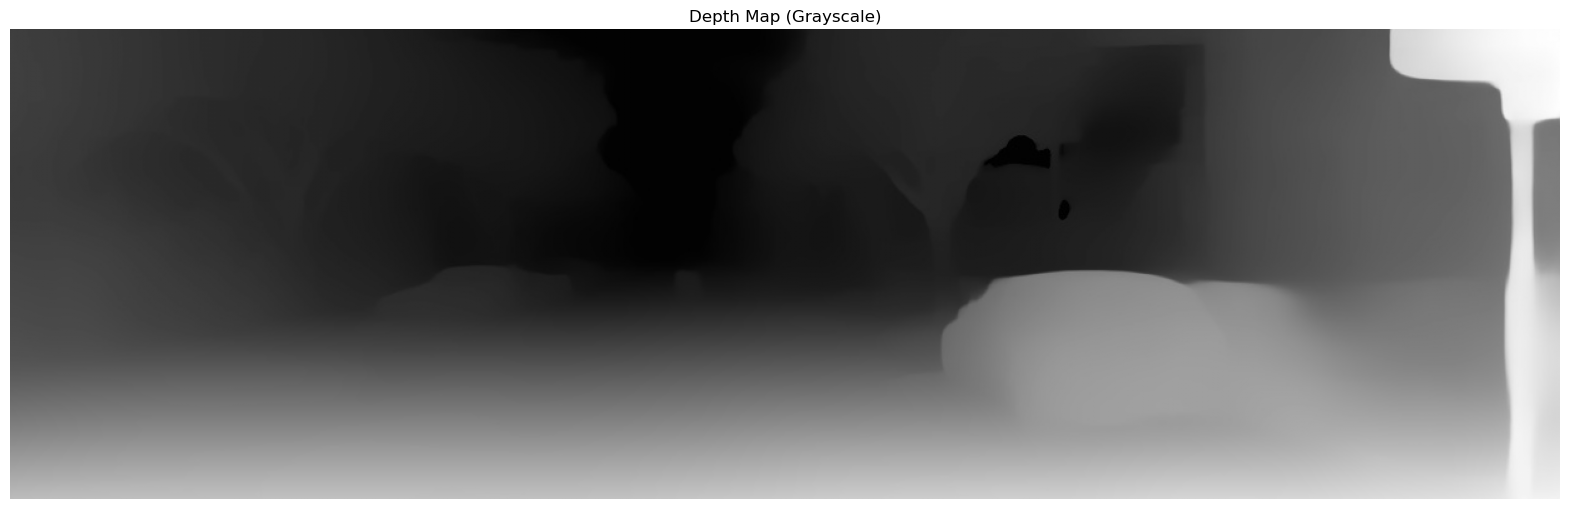

In [7]:
plt.figure(figsize=(20, 16))
plt.imshow(depth_map, cmap='gray')
plt.title("Depth Map (Grayscale)")
plt.axis("off")
plt.show()

### Resize Depth Map (Optional)

Optionally resizes the depth map using a scale factor to speed up processing.  
Set `scale = 1` to keep the original size.

In [8]:
# Resize for faster processing (optional)
scale = 1
depth_map = cv2.resize(depth_map, (0, 0), fx=scale, fy=scale)

h, w = depth_map.shape

### Define Grid Step

Defines the step size for sampling points on the depth map.  
Smaller `step` gives higher resolution but slower rendering.

- `x_points`: horizontal indices  
- `y_points`: vertical indices

In [9]:
step = 5  # adjust spacing
x_points = np.arange(0, w, step)
y_points = np.arange(0, h, step)

### Generate 2D Meshgrid

Creates a grid of X and Y coordinates using `np.meshgrid()` based on selected `x_points` and `y_points`.

- `X`, `Y` will represent the horizontal (image plane) coordinates of grid points.


In [10]:
X, Y = np.meshgrid(x_points, y_points)
Z = []

### Convert Depth Intensity to Z Values

For each point `(x, y)`, reads the grayscale intensity and converts it to a Z (depth) value:

$$
z = \left(1.0 - \frac{\text{intensity}}{255.0}\right) \times 500
$$


- This inversion makes **black areas (intensity = 0)** appear **farthest (Z = 500)**  
- And **white areas (intensity = 255)** appear **closest (Z = 0)**  
- Multiplied by 500 to scale for better visibility


In [11]:
# Normalize depth: 0 (black) => 1.0 (far), 255 (white) => 0.0 (close)
for y in y_points:
    row = []
    for x in x_points:
        intensity = depth_map[y, x]
        z = 1.0 - (intensity / 255.0)  # inverse: black => 1.0, white => 0.0
        row.append(z * 500)  # scale Z for visibility
    Z.append(row)


Z = np.array(Z)

### Plot with Custom View Angle

One is 3D scatter plot and other is with a top-down view.

- `elev=270°`, `azim=90°`: rotates the view to simulate looking from the side or top.
- This helps understand structure and height variations more clearly.

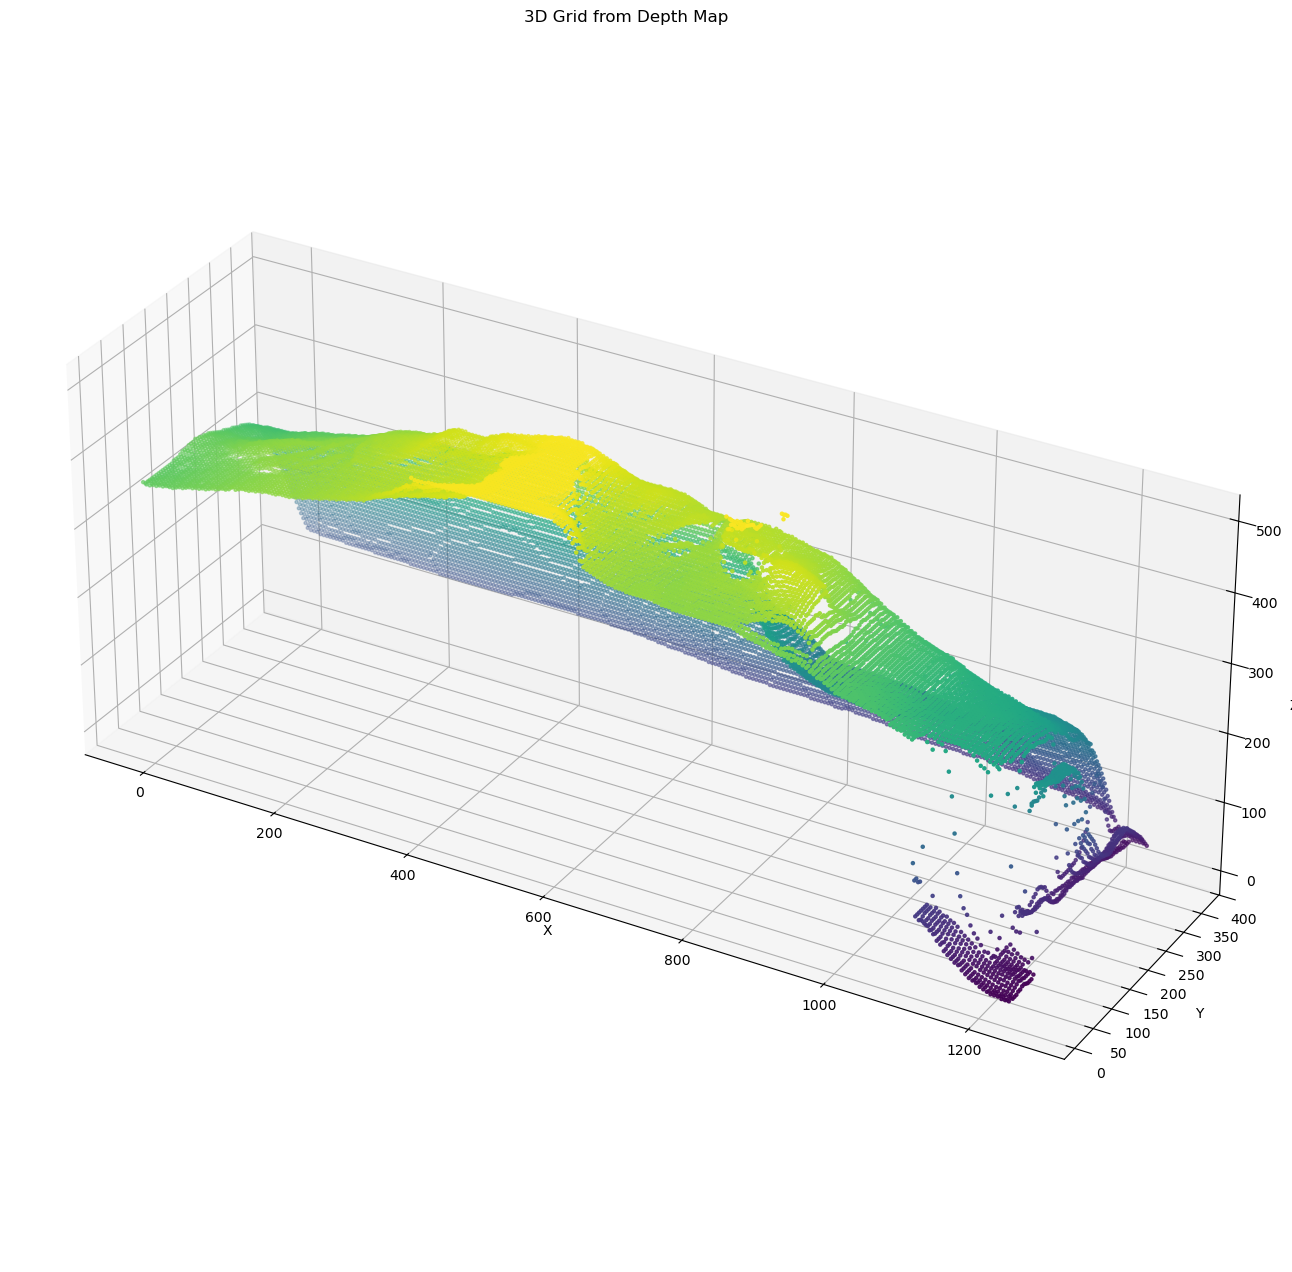

In [15]:
# Plot the grid in 3D
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=Z, cmap='viridis', s=5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([np.ptp(X), np.ptp(Y), np.ptp(Z)])

plt.title("3D Grid from Depth Map")
plt.show()

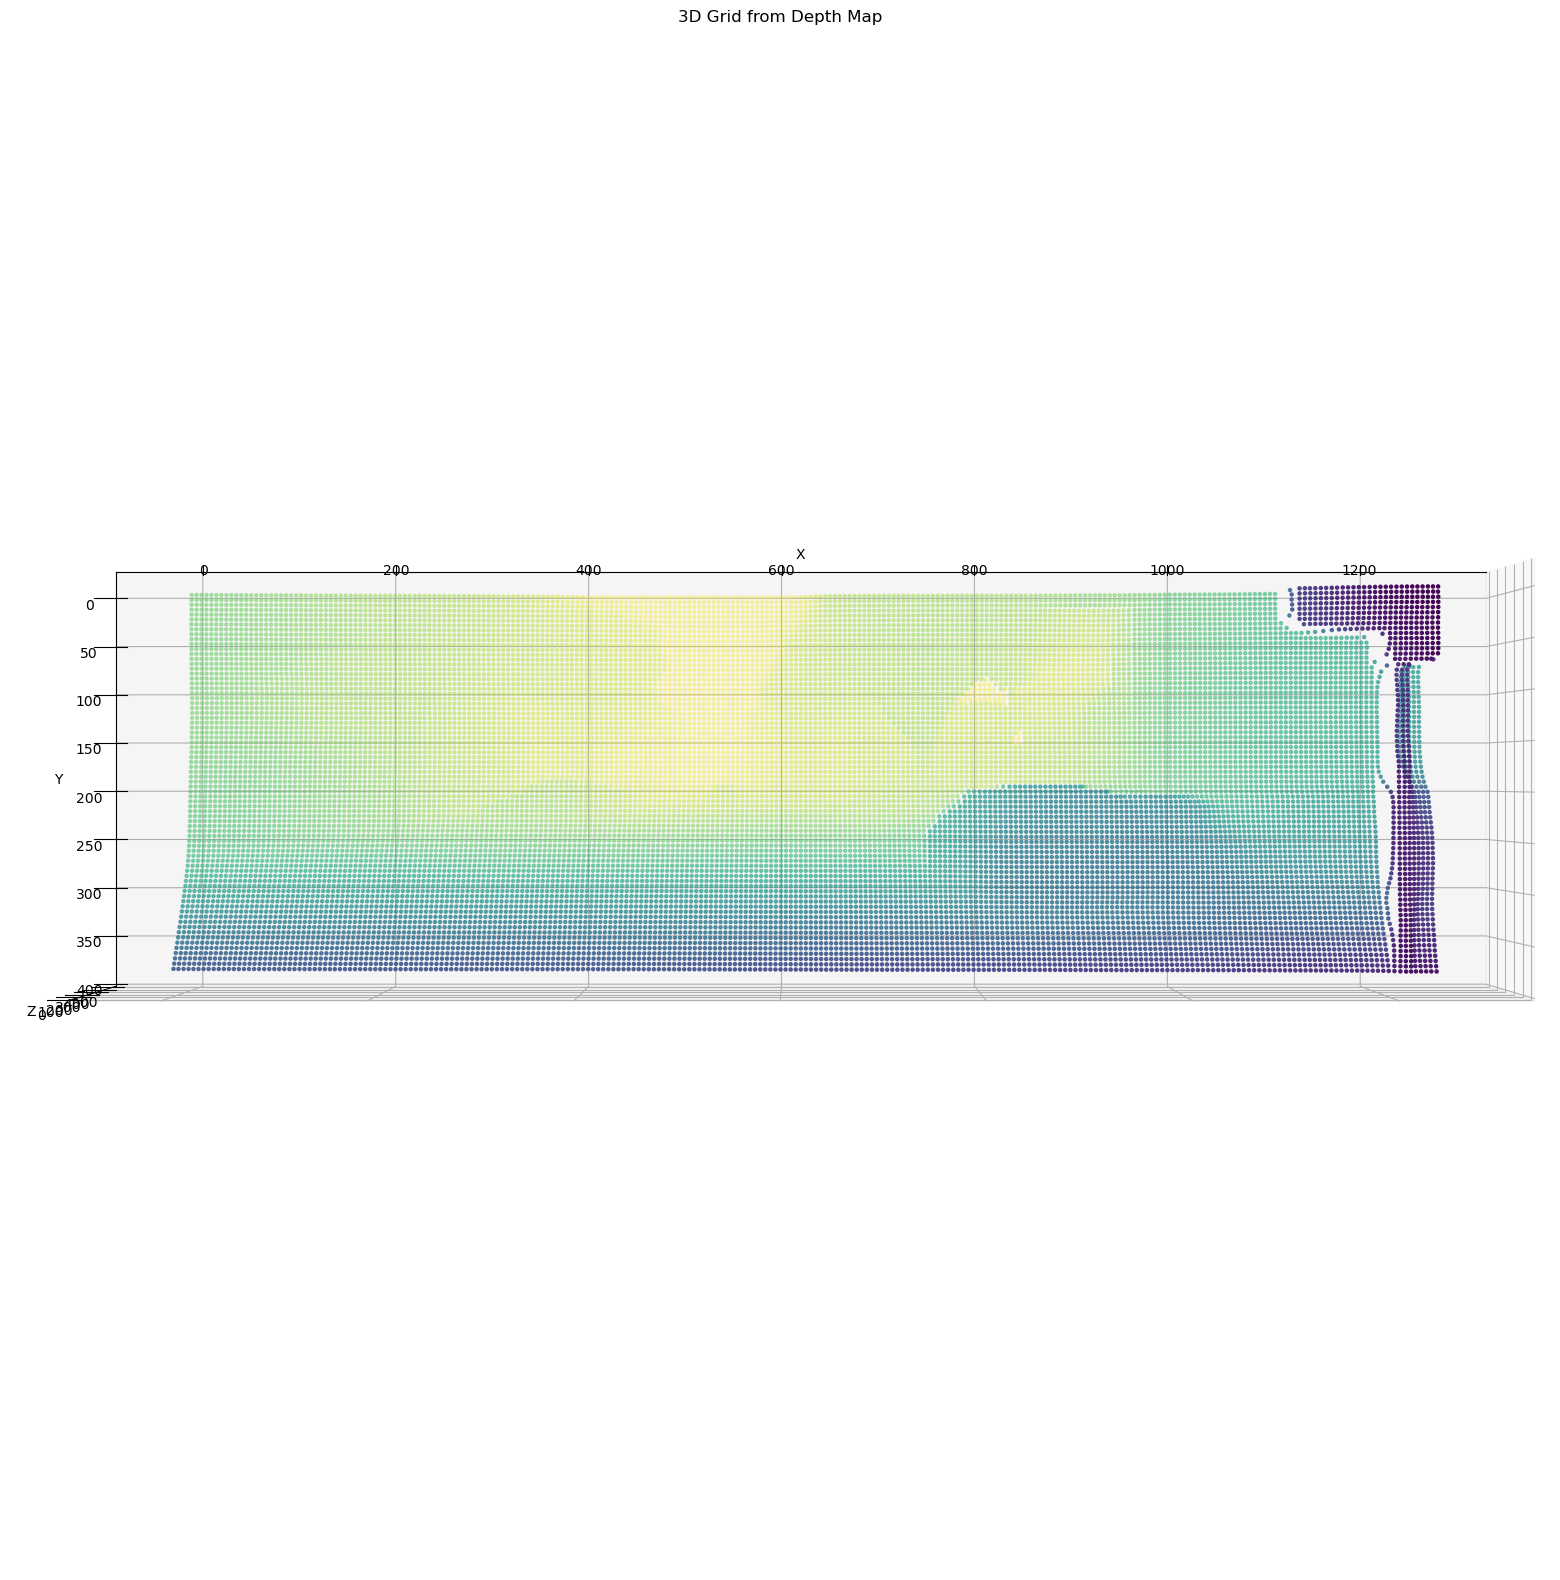

In [13]:
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=Z, cmap='viridis', s=5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([np.ptp(X), np.ptp(Y), np.ptp(Z)])
plt.title("3D Grid from Depth Map")

# Set view angle
ax.view_init(elev=360-90, azim=90)

plt.show()